In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, precision_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [3]:
data = pd.read_csv(r"/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
data.set_index(keys = 'customer_id', inplace = True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
missed_count = data.isnull().sum().sort_values(ascending=False).head(50)
missingPercnt = (missed_count/len(data))*100

pd.DataFrame({'No. missing values': missed_count, '% of missing data':
              missingPercnt.values})

,No. missing values,% of missing data
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
products_number,0,0.0
credit_card,0,0.0
active_member,0,0.0
estimated_salary,0,0.0


In [7]:
# Numeric Data
data.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 781.2 KB


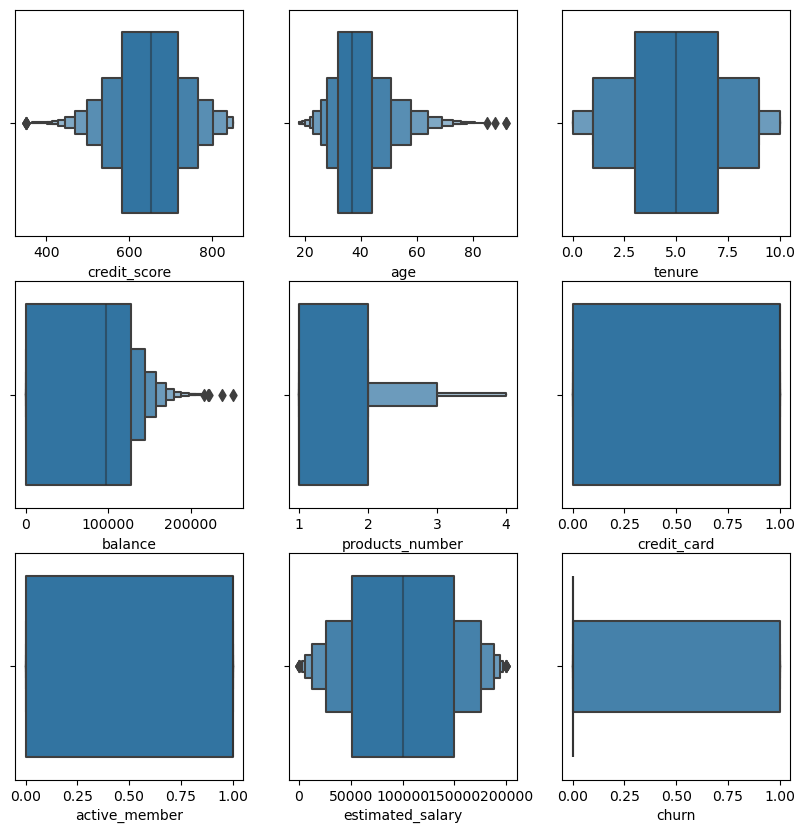

In [8]:
numeric_data = data.select_dtypes(np.number).columns

plt.figure(figsize=(10, 10))
for i, column in enumerate(numeric_data):
    plt.subplot(3,3, i+1)
    sns.boxenplot(x = data[column])
plt.show()

In [9]:
# Catagorical Data
data.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  10000 non-null  object
 1   gender   10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [10]:
categorical_data = ['country', 'gender']

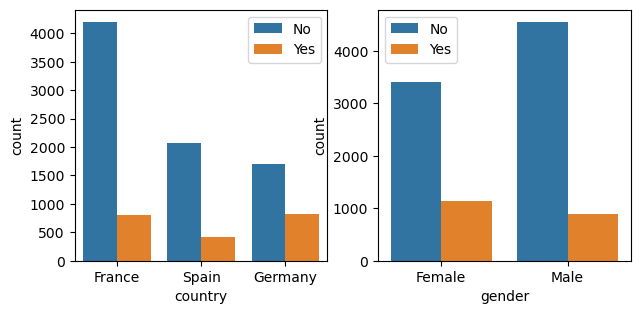

In [11]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_data):
    plt.subplot(4,4, i+1)
    sns.countplot(x=col, hue="churn", data=data)
    plt.legend(['No', 'Yes'])
plt.show()

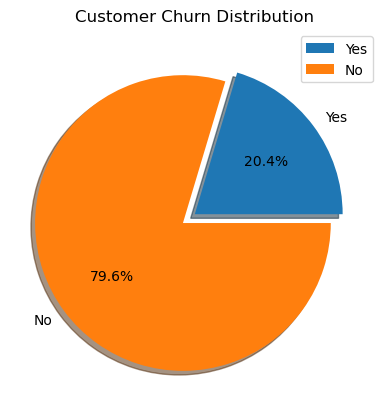

In [12]:
churn = data[data['churn'] == 1].shape[0]
stay = data[data['churn'] == 0].shape[0]
explode = (0, 0.1)

plt.title("Customer Churn Distribution")
plt.pie([churn, stay], labels=['Yes', 'No'], autopct='%1.1f%%', shadow=True, explode = explode)
plt.legend()
plt.show()

In [13]:
for column in categorical_data:
    unique_vals = data[column].unique()
    print(f'Column: {column}')
    print(unique_vals)
    print(len(unique_vals))
    print('----------------------')

Column: country
['France' 'Spain' 'Germany']
3
----------------------
Column: gender
['Female' 'Male']
2
----------------------


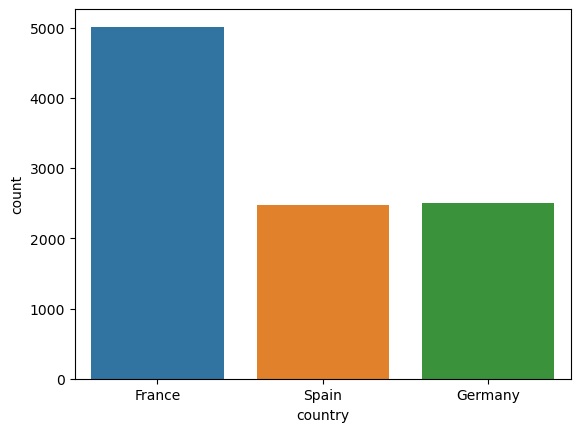

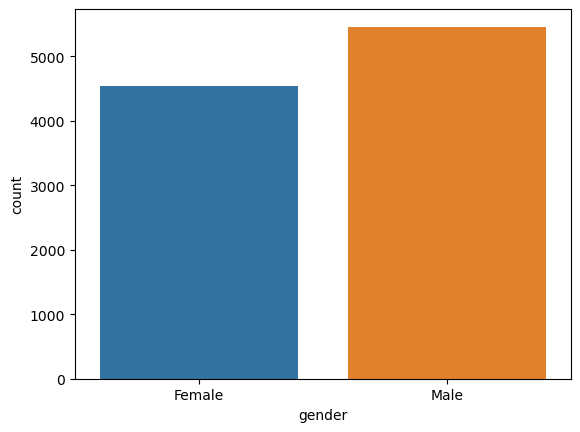

In [14]:
for col in categorical_data:
    sns.countplot(x=col, data=data)
    plt.xticks()
    plt.show()

**Label Encoding**

In [15]:
label_encode_cols = categorical_data
encoded_data = data.copy()

encoders = {}

for column in label_encode_cols:
    encoder = LabelEncoder()
    encoded_data[column] = encoder.fit_transform(encoded_data[column])
    encoders[column] = encoder

dump(encoders, '/kaggle/working/encoders.joblib')

['/kaggle/working/encoders.joblib']

In [16]:
encoded_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


[]

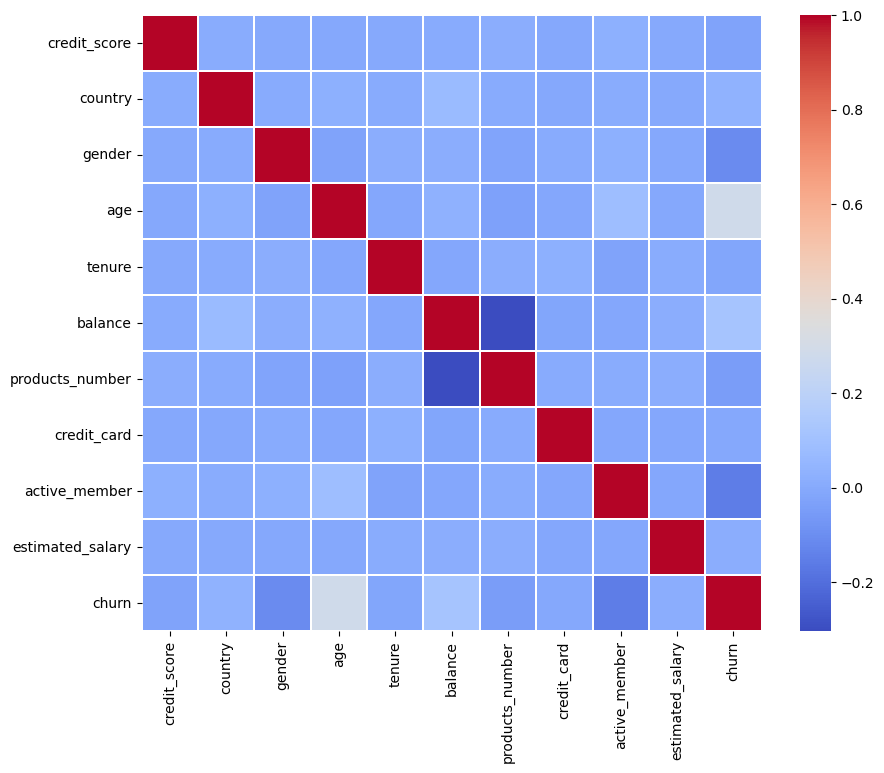

In [17]:
#Heatmap

plt.figure(figsize=(10, 8))
corr_matrix = encoded_data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1)

plt.plot()

In [18]:
encoded_data.describe()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Splitting Data**

In [19]:
X = encoded_data.drop(['churn'], axis = 1)
y = encoded_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

print('Training Data: ', X_train.shape, ', ' , y_train.shape)
print('Testing Data: ', X_test.shape, ', ' , y_test.shape)

Training Data:  (7000, 10) ,  (7000,)
Testing Data:  (3000, 10) ,  (3000,)


In [22]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [23]:
evaluation_dict = {}

In [33]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

In [25]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]

In [26]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]


In [27]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]


In [36]:
# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_f1_score = f1_score(y_test, knn_pred,average='macro')
evaluation_dict['KNN'] = [knn_precision, knn_recall, knn_f1_score, knn_accuracy]

In [38]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_f1_score = f1_score(y_test, xgb_pred,average='macro')
evaluation_dict['XGBoost'] = [xgb_precision, xgb_recall, xgb_f1_score, xgb_accuracy]

In [39]:
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred,average='macro')
lgbm_recall = recall_score(y_test, lgbm_pred,average='macro')
lgbm_f1_score = f1_score(y_test, lgbm_pred,average='macro')
evaluation_dict['LightGBM'] = [lgbm_precision, lgbm_recall, lgbm_f1_score, lgbm_accuracy]

In [40]:
# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred,average='macro')
adaboost_recall = recall_score(y_test, adaboost_pred,average='macro')
adaboost_f1_score = f1_score(y_test, adaboost_pred,average='macro')
evaluation_dict['AdaBoost'] = [adaboost_precision, adaboost_recall, adaboost_f1_score, adaboost_accuracy]

In [41]:
df = pd.DataFrame.from_dict(evaluation_dict, orient='index', columns=['Precision', 'Recall', 'F1 Score','Accuracy'])
df

,Precision,Recall,F1 Score,Accuracy
Logistic Regression,0.713552,0.567472,0.572109,0.806000
SVC,0.836072,0.655813,0.690961,0.847333
Random Forest,0.823764,0.695842,0.731569,0.856667
Gradient Boosting,0.842471,0.694556,0.733175,0.860333
Multilayer Perceptron,0.805899,0.703150,0.735075,0.854000
KNN,0.769690,0.658411,0.686799,0.834333
XGBoost,0.798302,0.708512,0.738115,0.853000
LightGBM,0.823503,0.718793,0.752404,0.862667
AdaBoost,0.816701,0.701024,0.735212,0.856333


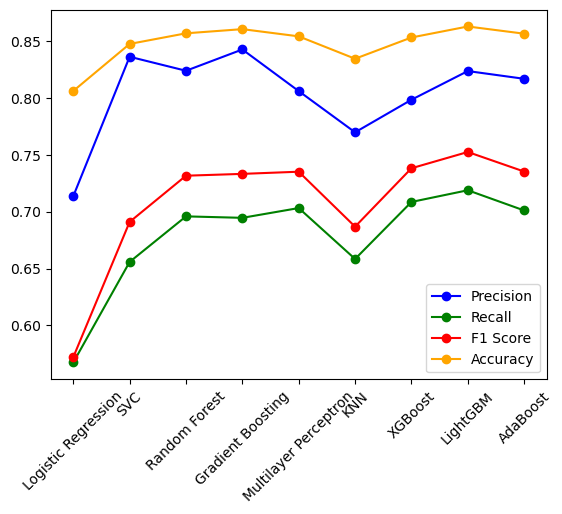

In [42]:
colors = ['blue', 'green', 'red', 'orange']
for i, matric in enumerate(df.columns):
    plt.plot(df[matric], marker='o', color=colors[i], label=matric)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Random Forest
accuracy:  0.8566666666666667
precison:  0.8237643243146116
recall:  0.6958417907771066
f1_score:  0.731568538667448


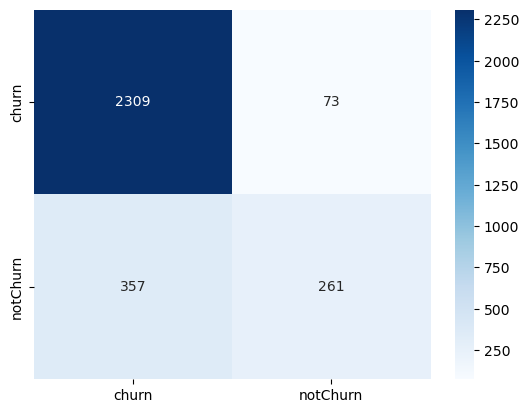

In [64]:
# Random Forest
print('Random Forest')
print("accuracy: ", rf_accuracy)
print("precison: ", rf_precision)
print("recall: ", rf_recall)
print("f1_score: ", rf_f1_score)

labels = ('churn', 'notChurn')
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot = True, cmap='Blues', fmt='g')
plt.show()

In [32]:
encoded_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
